In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
data = pd.read_csv('Hospital_Readmissions_Reduction_Program.csv')

In [3]:
data.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344 entries, 0 to 19343
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               19344 non-null  object 
 1   Facility ID                 19344 non-null  int64  
 2   State                       19344 non-null  object 
 3   Measure Name                19344 non-null  object 
 4   Number of Discharges        11440 non-null  float64
 5   Footnote                    5274 non-null   float64
 6   Excess Readmission Ratio    14071 non-null  float64
 7   Predicted Readmission Rate  14071 non-null  float64
 8   Expected Readmission Rate   14071 non-null  float64
 9   Number of Readmissions      14071 non-null  object 
 10  Start Date                  19344 non-null  object 
 11  End Date                    19344 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [5]:
too_few = data[data['Number of Readmissions'] == 'Too Few to Report']
is_null = data.loc[pd.isnull(data['Number of Discharges']) 
                   & pd.isnull(data['Number of Readmissions'])]
not_null = data.loc[pd.notnull(data['Number of Discharges']) 
                    | pd.notnull(data['Number of Readmissions'])]
not_zero = not_null[not_null['Number of Discharges'] != 0]
clean_data = not_zero.replace('Too Few to Report', np.NaN)
clean_data['Number of Readmissions'] = clean_data['Number of Readmissions'].astype(float)

In [6]:
clean_data['Readmissions Rate'] = clean_data['Number of Readmissions'] / clean_data['Number of Discharges'] *100

In [7]:
def filter(data, col_name, filter_value):
    return data[data[col_name] == filter_value]

In [8]:
clean_data['Actual Excess Readmission Ratio'] = clean_data['Readmissions Rate'] / clean_data['Expected Readmission Rate']

In [9]:
clean_data

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,301.0,NaN,1.1787,5.5863,4.7392,20.0,07/01/2015,06/30/2018,6.644518,1.402034
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,279.0,NaN,1.2361,14.5943,11.8065,46.0,07/01/2015,06/30/2018,16.487455,1.396473
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,742.0,NaN,1.0446,15.2935,14.6404,116.0,07/01/2015,06/30/2018,15.633423,1.067828
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1114.0,NaN,1.0453,22.3772,21.4082,252.0,07/01/2015,06/30/2018,22.621185,1.056660
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,495.0,NaN,1.0249,18.6162,18.1637,94.0,07/01/2015,06/30/2018,18.989899,1.045486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19314,HOUSTON METHODIST THE WOODLANDS HOSPITAL,670122,TX,READM-30-AMI-HRRP,NaN,NaN,1.0168,16.6858,16.4107,NaN,07/01/2015,06/30/2018,NaN,NaN
19316,HOUSTON METHODIST THE WOODLANDS HOSPITAL,670122,TX,READM-30-COPD-HRRP,NaN,NaN,1.0240,18.6577,18.2205,NaN,07/01/2015,06/30/2018,NaN,NaN
19317,HOUSTON METHODIST THE WOODLANDS HOSPITAL,670122,TX,READM-30-HF-HRRP,79.0,NaN,1.0489,21.6269,20.6191,20.0,07/01/2015,06/30/2018,25.316456,1.227816
19318,HOUSTON METHODIST THE WOODLANDS HOSPITAL,670122,TX,READM-30-HIP-KNEE-HRRP,NaN,NaN,1.1380,4.5980,4.0405,NaN,07/01/2015,06/30/2018,NaN,NaN


In [10]:
#data.loc[pd.isnull(data['Footnote']) & pd.isnull(data['Number of Discharges'])]
#data[data['Number of Readmissions'] == 'Too Few to Report']
#data.loc[pd.isnull(data['Number of Discharges']) 
#         & pd.notnull(data['Expected Readmission Rate'])];

In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14071 entries, 0 to 19319
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Facility Name                    14071 non-null  object 
 1   Facility ID                      14071 non-null  int64  
 2   State                            14071 non-null  object 
 3   Measure Name                     14071 non-null  object 
 4   Number of Discharges             11328 non-null  float64
 5   Footnote                         1 non-null      float64
 6   Excess Readmission Ratio         14071 non-null  float64
 7   Predicted Readmission Rate       14071 non-null  float64
 8   Expected Readmission Rate        14071 non-null  float64
 9   Number of Readmissions           11328 non-null  float64
 10  Start Date                       14071 non-null  object 
 11  End Date                         14071 non-null  object 
 12  Readmissions Rate 

In [12]:
clean_data.describe()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio
count,14071.000000,11328.000000,1.0,14071.000000,14071.000000,14071.000000,11328.000000,11328.000000,11328.000000
mean,259191.422429,397.193415,23.0,1.002507,15.383346,15.337661,62.696239,16.840352,1.029126
std,157740.361704,362.872261,NaN,0.089052,5.959672,5.778370,61.087763,6.186097,0.226248
min,10001.000000,26.000000,23.0,0.623000,2.199400,2.799700,11.000000,1.696833,0.392452
25%,110092.000000,162.000000,23.0,0.950850,13.285200,13.540200,22.000000,13.725490,0.890323
50%,250050.000000,293.500000,23.0,0.997800,16.712700,16.639300,43.000000,17.391304,1.008287
75%,390072.000000,512.000000,23.0,1.049400,19.559800,19.647700,81.000000,20.858896,1.135133
max,670122.000000,9356.000000,23.0,2.183200,30.257900,25.697100,906.000000,48.979592,4.194772


In [46]:
num_fac_by_type = clean_data.groupby('Facility ID').count()['Facility Name'].value_counts().sort_index()
num_fac_by_type

1    162
2     71
3    349
4    581
5    938
6    951
Name: Facility Name, dtype: int64

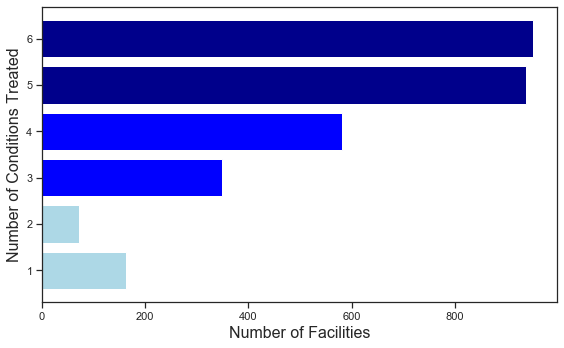

In [61]:
fig, axs = plt.subplots(figsize=(8,5))

axs.barh(num_fac_by_type.index, num_fac_by_type, color=['lightblue','lightblue','blue','blue','darkblue','darkblue'])
axs.set_xlabel('Number of Facilities', fontsize=16)
axs.set_ylabel('Number of Conditions Treated', fontsize=16)

plt.tight_layout()
fig.savefig('num_of_facilities.png')

In [14]:
temp_ = clean_data.groupby('Facility ID').count().reset_index().copy()
type_fac = pd.DataFrame({'Facility ID': temp_['Facility ID'],
                         'Number of Departments': temp_['Facility Name']})

conditions = [type_fac['Number of Departments'] > 4,
             (type_fac['Number of Departments'] >= 3) & (type_fac['Number of Departments'] <= 4),
             type_fac['Number of Departments'] < 3]

values = ['General', 'Neither', 'Specialized']

type_fac['Type'] = np.select(conditions,values)

data_dept = pd.merge(clean_data, type_fac, on='Facility ID', how='left')

In [15]:
data_dept.groupby('Type').mean()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio,Number of Departments
Type,,,,,,,,,,
General,258458.439400,453.839977,NaN,1.002513,15.213331,15.182151,71.869791,16.350145,1.021126,5.548865
Neither,259001.601899,167.575719,23.0,1.005125,16.337119,16.228839,29.942470,19.041554,1.059514,3.689410
Specialized,286362.398026,775.275229,NaN,0.973248,10.621195,10.773589,27.816514,8.924213,1.019990,1.467105


In [16]:
data_dept.groupby('Type').std()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio,Number of Departments
Type,,,,,,,,,,
General,156785.199897,359.398509,NaN,0.094286,5.954723,5.790323,65.274989,6.038139,0.220464,0.497630
Neither,157164.793285,119.315326,NaN,0.069641,5.634923,5.402813,21.042127,5.883250,0.239854,0.462804
Specialized,191335.275618,1160.996083,NaN,0.091589,6.766671,6.708560,27.824571,8.844306,0.315701,0.499739


In [17]:
general = data_dept[data_dept['Type'] == 'General']['Readmissions Rate']
specialized = data_dept[data_dept['Type'] == 'Specialized']['Readmissions Rate']
stats.ttest_ind(general,specialized, equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=8.740939598253302, pvalue=3.0910084528714927e-14)

In [18]:
filter(data_dept,'Type','Specialized').groupby('Measure Name').count()

,Facility Name,Facility ID,State,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio,Number of Departments,Type
Measure Name,,,,,,,,,,,,,,,
READM-30-AMI-HRRP,5,5,5,1,0,5,5,5,1,5,5,1,1,5,5
READM-30-COPD-HRRP,35,35,35,5,0,35,35,35,5,35,35,5,5,35,35
READM-30-HF-HRRP,32,32,32,6,0,32,32,32,6,32,32,6,6,32,32
READM-30-HIP-KNEE-HRRP,134,134,134,74,0,134,134,134,74,134,134,74,74,134,134
READM-30-PN-HRRP,98,98,98,23,0,98,98,98,23,98,98,23,23,98,98


In [19]:
filter(data_dept,'Type','General').groupby('Measure Name').count()

,Facility Name,Facility ID,State,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio,Number of Departments,Type
Measure Name,,,,,,,,,,,,,,,
READM-30-AMI-HRRP,1889,1889,1889,1543,0,1889,1889,1889,1543,1889,1889,1543,1543,1889,1889
READM-30-CABG-HRRP,985,985,985,572,0,985,985,985,572,985,985,572,572,985,985
READM-30-COPD-HRRP,1887,1887,1887,1848,0,1887,1887,1887,1848,1887,1887,1848,1848,1887,1887
READM-30-HF-HRRP,1889,1889,1889,1884,0,1889,1889,1889,1884,1889,1889,1884,1884,1889,1889
READM-30-HIP-KNEE-HRRP,1857,1857,1857,1125,0,1857,1857,1857,1125,1857,1857,1125,1125,1857,1857
READM-30-PN-HRRP,1889,1889,1889,1883,0,1889,1889,1889,1883,1889,1889,1883,1883,1889,1889


In [20]:
filter(data_dept,'Type','Neither').groupby('Measure Name').count()

,Facility Name,Facility ID,State,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio,Number of Departments,Type
Measure Name,,,,,,,,,,,,,,,
READM-30-AMI-HRRP,159,159,159,81,0,159,159,159,81,159,159,81,81,159,159
READM-30-CABG-HRRP,8,8,8,7,0,8,8,8,7,8,8,7,7,8,8
READM-30-COPD-HRRP,898,898,898,668,1,898,898,898,668,898,898,668,668,898,898
READM-30-HF-HRRP,922,922,922,749,0,922,922,922,749,922,922,749,749,922,922
READM-30-HIP-KNEE-HRRP,460,460,460,62,0,460,460,460,62,460,460,62,62,460,460
READM-30-PN-HRRP,924,924,924,797,0,924,924,924,797,924,924,797,797,924,924


In [21]:
filter(data_dept,'Number of Departments',1).groupby('Measure Name').count()

,Facility Name,Facility ID,State,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio,Number of Departments,Type
Measure Name,,,,,,,,,,,,,,,
READM-30-AMI-HRRP,2,2,2,0,0,2,2,2,0,2,2,0,0,2,2
READM-30-COPD-HRRP,3,3,3,1,0,3,3,3,1,3,3,1,1,3,3
READM-30-HF-HRRP,2,2,2,0,0,2,2,2,0,2,2,0,0,2,2
READM-30-HIP-KNEE-HRRP,123,123,123,72,0,123,123,123,72,123,123,72,72,123,123
READM-30-PN-HRRP,32,32,32,4,0,32,32,32,4,32,32,4,4,32,32


In [22]:
all_fac = clean_data.groupby(['State'])['Facility ID'].nunique().reset_index()
ami_fac = clean_data[clean_data['Measure Name'] == 'READM-30-AMI-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().reset_index()
cabg_fac = clean_data[clean_data['Measure Name'] == 'READM-30-CABG-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().reset_index()
copd_fac = clean_data[clean_data['Measure Name'] == 'READM-30-COPD-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().reset_index()
hf_fac = clean_data[clean_data['Measure Name'] == 'READM-30-HF-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().reset_index()
hk_fac = clean_data[clean_data['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().reset_index()
pn_fac = clean_data[clean_data['Measure Name'] == 'READM-30-PN-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().reset_index()

In [23]:
facilities = pd.DataFrame({'State': all_fac['State'],
                           'All': all_fac['Facility ID'],
                           'Heart Attack': ami_fac['Facility ID'],
                           'CABG': cabg_fac['Facility ID'],
                           'COPD': copd_fac['Facility ID'],
                           'Heart Failure': hf_fac['Facility ID'],
                           'Hip-Knee': hk_fac['Facility ID'],
                           'Pneumonia': pn_fac['Facility ID']})

In [63]:
facilities = facilities.sort_values('All').reset_index().drop('index', axis=1)

[Text(0, 0, 'VT'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'WY'),
 Text(0, 0, 'HI')]

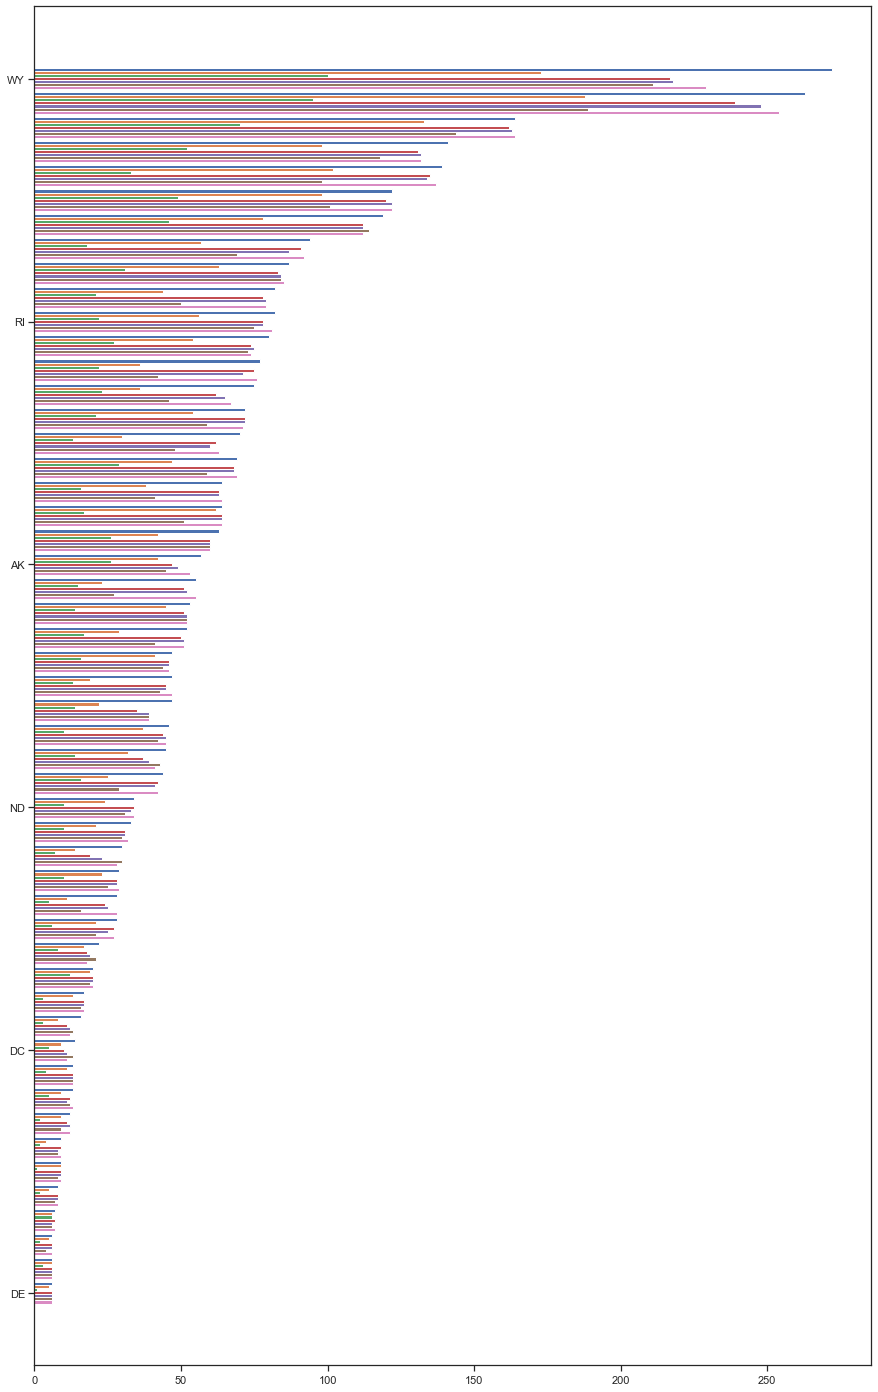

In [25]:
fig, ax = plt.subplots(figsize=(15,25))
w=.125

ax.barh(facilities.index+3*w, facilities['All'],w)
ax.barh(facilities.index+2*w, facilities['Heart Attack'],w)
ax.barh(facilities.index+w, facilities['CABG'],w)
ax.barh(facilities.index, facilities['COPD'],w)
ax.barh(facilities.index-w, facilities['Heart Failure'],w)
ax.barh(facilities.index-2*w, facilities['Hip-Knee'],w)
ax.barh(facilities.index-3*w, facilities['Pneumonia'],w)

ax.set_yticklabels(facilities['State'])

In [26]:
all_fac

,State,Facility ID
0,AK,8
1,AL,77
2,AR,44
3,AZ,57
4,CA,263
5,CO,45
6,CT,29
7,DC,6
8,DE,6
9,FL,164


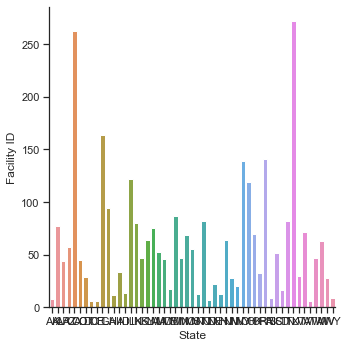

In [27]:
sns.catplot(x="State",y="Facility ID", kind="bar", data=all_fac)

In [28]:
clean_data.groupby(['State']).mean().sort_values('Excess Readmission Ratio', ascending=False)

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio
State,,,,,,,,,
MA,220071.195489,589.298701,NaN,1.041469,15.892829,15.216896,100.761905,17.743242,1.101833
NV,290028.200000,335.791209,NaN,1.041261,15.805611,15.165956,58.274725,18.582357,1.124312
NJ,310050.878882,550.586207,NaN,1.031097,16.746389,16.246070,94.251724,18.427120,1.092036
NY,330166.208138,435.625926,23.0,1.030577,16.706844,16.095986,76.340741,18.791362,1.099853
FL,100149.937799,469.415761,NaN,1.030100,16.174410,15.696120,78.854620,17.924962,1.091603
MS,250069.363229,340.324176,NaN,1.026362,15.888374,15.470736,58.543956,18.010274,1.088422
KY,180063.210526,400.778243,NaN,1.022676,16.970258,16.554158,72.050209,18.685777,1.049888
AR,40056.148718,377.132530,NaN,1.021702,15.057693,14.708319,59.602410,16.863754,1.080042
AL,10076.478261,346.019608,NaN,1.020306,15.663348,15.466084,55.403922,16.760878,1.066774


In [29]:
clean_data.groupby(['Measure Name']).count()

,Facility Name,Facility ID,State,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio
Measure Name,,,,,,,,,,,,,
READM-30-AMI-HRRP,2053,2053,2053,1625,0,2053,2053,2053,1625,2053,2053,1625,1625
READM-30-CABG-HRRP,993,993,993,579,0,993,993,993,579,993,993,579,579
READM-30-COPD-HRRP,2820,2820,2820,2521,1,2820,2820,2820,2521,2820,2820,2521,2521
READM-30-HF-HRRP,2843,2843,2843,2639,0,2843,2843,2843,2639,2843,2843,2639,2639
READM-30-HIP-KNEE-HRRP,2451,2451,2451,1261,0,2451,2451,2451,1261,2451,2451,1261,1261
READM-30-PN-HRRP,2911,2911,2911,2703,0,2911,2911,2911,2703,2911,2911,2703,2703


In [30]:
clean_data.groupby(['Measure Name']).mean()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio
Measure Name,,,,,,,,,
READM-30-AMI-HRRP,258033.864101,277.545846,NaN,1.001453,15.764015,15.710386,42.442462,16.341146,1.042634
READM-30-CABG-HRRP,255158.826788,182.081174,NaN,1.002192,12.809151,12.771704,23.671848,13.938673,1.084982
READM-30-COPD-HRRP,258433.558156,297.218167,23.0,1.001176,19.059690,19.029198,58.444268,19.418942,1.010698
READM-30-HF-HRRP,257906.518466,428.156499,NaN,1.001901,21.102234,21.042851,91.730959,21.549066,1.017639
READM-30-HIP-KNEE-HRRP,265709.915953,659.980174,NaN,1.006649,4.259320,4.223695,26.379857,4.584692,1.087519
READM-30-PN-HRRP,257884.025077,455.620792,NaN,1.001752,16.212461,16.159761,75.792453,16.477327,1.010202


In [31]:
cal = clean_data[clean_data['State'] == 'CA']
cal.groupby('Facility ID').count()

,Facility Name,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio
Facility ID,,,,,,,,,,,,,
50002,5,5,5,5,0,5,5,5,5,5,5,5,5
50006,5,5,5,4,0,5,5,5,4,5,5,4,4
50007,6,6,6,5,0,6,6,6,5,6,6,5,5
50008,3,3,3,2,0,3,3,3,2,3,3,2,2
50009,6,6,6,4,0,6,6,6,4,6,6,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50776,3,3,3,3,0,3,3,3,3,3,3,3,3
50779,3,3,3,3,0,3,3,3,3,3,3,3,3
50780,1,1,1,1,0,1,1,1,1,1,1,1,1


In [32]:
clean_data.groupby(['Measure Name']).sum()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio
Measure Name,,,,,,,,,
READM-30-AMI-HRRP,529743523,451012.0,0.0,2055.9831,32363.5230,32253.4216,68969.0,26554.362263,1694.281016
READM-30-CABG-HRRP,253372715,105425.0,0.0,995.1767,12719.4873,12682.3021,13706.0,8070.491756,628.204543
READM-30-COPD-HRRP,728782634,749287.0,23.0,2823.3156,53748.3259,53662.3392,147338.0,48955.153700,2547.969274
READM-30-HF-HRRP,733228232,1129905.0,0.0,2848.4037,59993.6523,59824.8248,242078.0,56867.984552,2685.549107
READM-30-HIP-KNEE-HRRP,651255004,832235.0,0.0,2467.2966,10439.5935,10352.2775,33265.0,5781.296570,1371.361157
READM-30-PN-HRRP,750700397,1231543.0,0.0,2916.0987,47194.4743,47041.0630,204867.0,44538.214175,2730.575929


In [33]:
clean_data.groupby(['Measure Name']).sum().sort_values('Number of Discharges', ascending=False).head(20)

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio
Measure Name,,,,,,,,,
READM-30-PN-HRRP,750700397,1231543.0,0.0,2916.0987,47194.4743,47041.0630,204867.0,44538.214175,2730.575929
READM-30-HF-HRRP,733228232,1129905.0,0.0,2848.4037,59993.6523,59824.8248,242078.0,56867.984552,2685.549107
READM-30-HIP-KNEE-HRRP,651255004,832235.0,0.0,2467.2966,10439.5935,10352.2775,33265.0,5781.296570,1371.361157
READM-30-COPD-HRRP,728782634,749287.0,23.0,2823.3156,53748.3259,53662.3392,147338.0,48955.153700,2547.969274
READM-30-AMI-HRRP,529743523,451012.0,0.0,2055.9831,32363.5230,32253.4216,68969.0,26554.362263,1694.281016
READM-30-CABG-HRRP,253372715,105425.0,0.0,995.1767,12719.4873,12682.3021,13706.0,8070.491756,628.204543


In [34]:
clean_data.groupby(['Measure Name']).sum().sort_values('Number of Readmissions', ascending=False).head(20)

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio
Measure Name,,,,,,,,,
READM-30-HF-HRRP,733228232,1129905.0,0.0,2848.4037,59993.6523,59824.8248,242078.0,56867.984552,2685.549107
READM-30-PN-HRRP,750700397,1231543.0,0.0,2916.0987,47194.4743,47041.0630,204867.0,44538.214175,2730.575929
READM-30-COPD-HRRP,728782634,749287.0,23.0,2823.3156,53748.3259,53662.3392,147338.0,48955.153700,2547.969274
READM-30-AMI-HRRP,529743523,451012.0,0.0,2055.9831,32363.5230,32253.4216,68969.0,26554.362263,1694.281016
READM-30-HIP-KNEE-HRRP,651255004,832235.0,0.0,2467.2966,10439.5935,10352.2775,33265.0,5781.296570,1371.361157
READM-30-CABG-HRRP,253372715,105425.0,0.0,995.1767,12719.4873,12682.3021,13706.0,8070.491756,628.204543


In [35]:
clean_data.groupby(['Measure Name']).mean().sort_values('Readmissions Rate', ascending=False)

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmissions Rate,Actual Excess Readmission Ratio
Measure Name,,,,,,,,,
READM-30-HF-HRRP,257906.518466,428.156499,NaN,1.001901,21.102234,21.042851,91.730959,21.549066,1.017639
READM-30-COPD-HRRP,258433.558156,297.218167,23.0,1.001176,19.059690,19.029198,58.444268,19.418942,1.010698
READM-30-PN-HRRP,257884.025077,455.620792,NaN,1.001752,16.212461,16.159761,75.792453,16.477327,1.010202
READM-30-AMI-HRRP,258033.864101,277.545846,NaN,1.001453,15.764015,15.710386,42.442462,16.341146,1.042634
READM-30-CABG-HRRP,255158.826788,182.081174,NaN,1.002192,12.809151,12.771704,23.671848,13.938673,1.084982
READM-30-HIP-KNEE-HRRP,265709.915953,659.980174,NaN,1.006649,4.259320,4.223695,26.379857,4.584692,1.087519


In [36]:
clean_data.sort_values('Number of Discharges', ascending=False).head(20)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio
11986,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,9356.0,NaN,0.6417,2.5894,4.0351,234.0,07/01/2015,06/30/2018,2.501069,0.619828
8482,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,5670.0,NaN,0.6790,2.4194,3.5634,130.0,07/01/2015,06/30/2018,2.292769,0.643422
3509,ADVENTHEALTH ORLANDO,100007,FL,READM-30-PN-HRRP,3905.0,NaN,1.1468,19.4292,16.9426,768.0,07/01/2015,06/30/2018,19.667093,1.160807
3507,ADVENTHEALTH ORLANDO,100007,FL,READM-30-HF-HRRP,3812.0,NaN,1.0807,23.6404,21.8753,906.0,07/01/2015,06/30/2018,23.767051,1.086479
5266,NORTHSHORE UNIVERSITY HEALTHSYSTEM EVANSTON HOSP,140010,IL,READM-30-HIP-KNEE-HRRP,3461.0,NaN,0.9050,3.4925,3.8589,119.0,07/01/2015,06/30/2018,3.438313,0.891008
2860,HOAG ORTHOPEDIC INSTITUTE,50769,CA,READM-30-HIP-KNEE-HRRP,3203.0,NaN,0.6369,2.4473,3.8427,70.0,07/01/2015,06/30/2018,2.185451,0.568728
8441,"SOUTHCOAST HOSPITAL GROUP, INC",220074,MA,READM-30-PN-HRRP,3188.0,NaN,1.1771,19.7592,16.7867,641.0,07/01/2015,06/30/2018,20.106650,1.197773
5267,NORTHSHORE UNIVERSITY HEALTHSYSTEM EVANSTON HOSP,140010,IL,READM-30-PN-HRRP,3119.0,NaN,1.0816,16.6031,15.3507,523.0,07/01/2015,06/30/2018,16.768195,1.092341
10750,MORRISTOWN MEDICAL CENTER,310015,NJ,READM-30-HIP-KNEE-HRRP,3092.0,NaN,1.1128,4.4625,4.0102,140.0,07/01/2015,06/30/2018,4.527814,1.129074
3418,"CHRISTIANA CARE HEALTH SERVICES, INC.",80001,DE,READM-30-HIP-KNEE-HRRP,2991.0,NaN,0.8961,3.6129,4.0320,106.0,07/01/2015,06/30/2018,3.543965,0.878960


In [37]:
clean_data.sort_values('Number of Readmissions', ascending=False).head(20)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio
3507,ADVENTHEALTH ORLANDO,100007,FL,READM-30-HF-HRRP,3812.0,NaN,1.0807,23.6404,21.8753,906.0,07/01/2015,06/30/2018,23.767051,1.086479
3509,ADVENTHEALTH ORLANDO,100007,FL,READM-30-PN-HRRP,3905.0,NaN,1.1468,19.4292,16.9426,768.0,07/01/2015,06/30/2018,19.667093,1.160807
8441,"SOUTHCOAST HOSPITAL GROUP, INC",220074,MA,READM-30-PN-HRRP,3188.0,NaN,1.1771,19.7592,16.7867,641.0,07/01/2015,06/30/2018,20.106650,1.197773
5265,NORTHSHORE UNIVERSITY HEALTHSYSTEM EVANSTON HOSP,140010,IL,READM-30-HF-HRRP,2877.0,NaN,1.0299,21.3837,20.7625,617.0,07/01/2015,06/30/2018,21.445951,1.032918
8907,"BEAUMONT HOSPITAL, ROYAL OAK",230130,MI,READM-30-HF-HRRP,2392.0,NaN,1.0714,24.4009,22.7749,588.0,07/01/2015,06/30/2018,24.581940,1.079343
8439,"SOUTHCOAST HOSPITAL GROUP, INC",220074,MA,READM-30-HF-HRRP,2233.0,NaN,1.1740,25.6989,21.8892,584.0,07/01/2015,06/30/2018,26.153157,1.194797
3333,YALE-NEW HAVEN HOSPITAL,70022,CT,READM-30-HF-HRRP,2591.0,NaN,1.0147,22.1188,21.7976,574.0,07/01/2015,06/30/2018,22.153609,1.016332
11505,NEW YORK-PRESBYTERIAN HOSPITAL-NEW YORK WEILL ...,330101,NY,READM-30-HF-HRRP,2368.0,NaN,1.0645,22.9365,21.5469,547.0,07/01/2015,06/30/2018,23.099662,1.072064
3417,"CHRISTIANA CARE HEALTH SERVICES, INC.",80001,DE,READM-30-HF-HRRP,2786.0,NaN,0.9290,19.4697,20.9582,538.0,07/01/2015,06/30/2018,19.310840,0.921398
5267,NORTHSHORE UNIVERSITY HEALTHSYSTEM EVANSTON HOSP,140010,IL,READM-30-PN-HRRP,3119.0,NaN,1.0816,16.6031,15.3507,523.0,07/01/2015,06/30/2018,16.768195,1.092341


In [38]:
clean_data.sort_values('Readmissions Rate', ascending=False).head(20)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio
5784,NORWEGIAN-AMERICAN HOSPITAL,140206,IL,READM-30-AMI-HRRP,49.0,NaN,1.1756,26.5181,22.5580,24.0,07/01/2015,06/30/2018,48.979592,2.171274
9523,MERIT HEALTH RIVER REGION,250031,MS,READM-30-CABG-HRRP,26.0,NaN,1.2918,19.1349,14.8124,12.0,07/01/2015,06/30/2018,46.153846,3.115893
2712,WHITTIER HOSPITAL MEDICAL CENTER,50735,CA,READM-30-AMI-HRRP,33.0,NaN,1.1085,25.2784,22.8046,15.0,07/01/2015,06/30/2018,45.454545,1.993218
14892,ROXBOROUGH MEMORIAL HOSPITAL,390304,PA,READM-30-AMI-HRRP,27.0,NaN,1.0776,23.1554,21.4885,11.0,07/01/2015,06/30/2018,40.740741,1.895932
1646,CALIFORNIA HOSPITAL MEDICAL CENTER LA,50149,CA,READM-30-COPD-HRRP,62.0,NaN,1.1138,25.7324,23.1024,25.0,07/01/2015,06/30/2018,40.322581,1.745385
15891,"JELLICO MEDICAL CENTER, INC",440180,TN,READM-30-HF-HRRP,66.0,NaN,1.1707,24.5819,20.9977,26.0,07/01/2015,06/30/2018,39.393939,1.876107
1254,OROVILLE HOSPITAL,50030,CA,READM-30-AMI-HRRP,85.0,NaN,1.2529,22.2860,17.7876,33.0,07/01/2015,06/30/2018,38.823529,2.182618
2372,HUNTINGTON BEACH HOSPITAL,50526,CA,READM-30-COPD-HRRP,70.0,NaN,1.1330,24.0813,21.2543,27.0,07/01/2015,06/30/2018,38.571429,1.814759
7169,HARLAN ARH HOSPITAL,180050,KY,READM-30-HF-HRRP,223.0,NaN,1.3867,29.1161,20.9961,86.0,07/01/2015,06/30/2018,38.565022,1.836771
1474,DOCTORS HOSPITAL OF RIVERSIDE,50102,CA,READM-30-HF-HRRP,94.0,NaN,1.1650,27.6810,23.7607,36.0,07/01/2015,06/30/2018,38.297872,1.611816


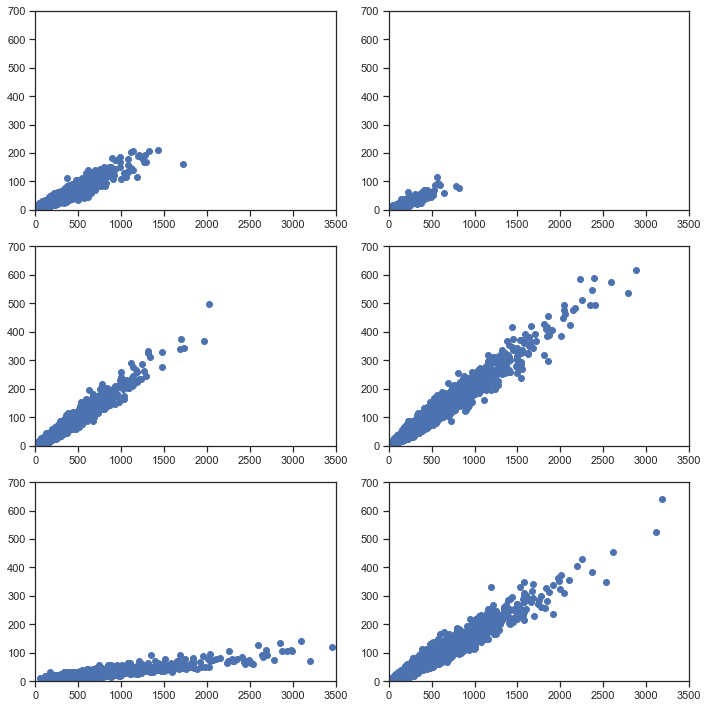

In [39]:
fig, ax = plt.subplots(3,2, figsize=(10,10))

x = 'Number of Discharges'
y = 'Number of Readmissions'

f1 = filter(clean_data, 'Measure Name', 'READM-30-AMI-HRRP')
f2 = filter(clean_data, 'Measure Name', 'READM-30-CABG-HRRP')
f3 = filter(clean_data, 'Measure Name', 'READM-30-COPD-HRRP')
f4 = filter(clean_data, 'Measure Name', 'READM-30-HF-HRRP')
f5 = filter(clean_data, 'Measure Name', 'READM-30-HIP-KNEE-HRRP')
f6 = filter(clean_data, 'Measure Name', 'READM-30-PN-HRRP')

ax[0][0].scatter(f1[x],f1[y])
ax[0][1].scatter(f2[x],f2[y])
ax[1][0].scatter(f3[x],f3[y])
ax[1][1].scatter(f4[x],f4[y])
ax[2][0].scatter(f5[x],f5[y])
ax[2][1].scatter(f6[x],f6[y])

ax[0][0].set_xlim([0,3500])
ax[0][1].set_xlim([0,3500])
ax[1][0].set_xlim([0,3500])
ax[1][1].set_xlim([0,3500])
ax[2][0].set_xlim([0,3500])
ax[2][1].set_xlim([0,3500])

ax[0][0].set_ylim([0,700])
ax[0][1].set_ylim([0,700])
ax[1][0].set_ylim([0,700])
ax[1][1].set_ylim([0,700])
ax[2][0].set_ylim([0,700])
ax[2][1].set_ylim([0,700])

plt.tight_layout()

In [40]:
clean_data[clean_data['Number of Discharges'] >= 3500]

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio
3507,ADVENTHEALTH ORLANDO,100007,FL,READM-30-HF-HRRP,3812.0,NaN,1.0807,23.6404,21.8753,906.0,07/01/2015,06/30/2018,23.767051,1.086479
3509,ADVENTHEALTH ORLANDO,100007,FL,READM-30-PN-HRRP,3905.0,NaN,1.1468,19.4292,16.9426,768.0,07/01/2015,06/30/2018,19.667093,1.160807
8482,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,5670.0,NaN,0.6790,2.4194,3.5634,130.0,07/01/2015,06/30/2018,2.292769,0.643422
11986,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,9356.0,NaN,0.6417,2.5894,4.0351,234.0,07/01/2015,06/30/2018,2.501069,0.619828


In [41]:
clean_data[clean_data['Number of Readmissions'] >= 700]

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions Rate,Actual Excess Readmission Ratio
3507,ADVENTHEALTH ORLANDO,100007,FL,READM-30-HF-HRRP,3812.0,NaN,1.0807,23.6404,21.8753,906.0,07/01/2015,06/30/2018,23.767051,1.086479
3509,ADVENTHEALTH ORLANDO,100007,FL,READM-30-PN-HRRP,3905.0,NaN,1.1468,19.4292,16.9426,768.0,07/01/2015,06/30/2018,19.667093,1.160807


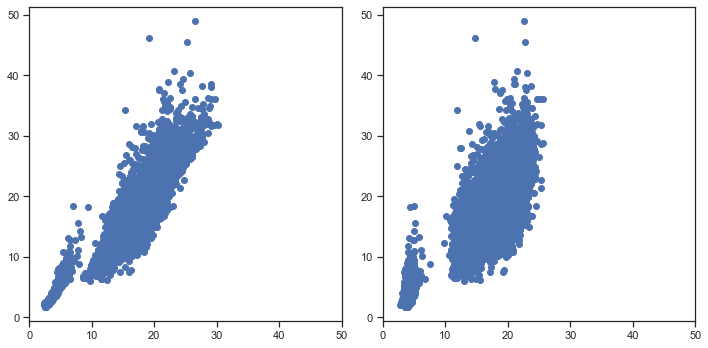

In [42]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(clean_data['Predicted Readmission Rate'], clean_data['Readmissions Rate'])
ax[1].scatter(clean_data['Expected Readmission Rate'], clean_data['Readmissions Rate'])

ax[0].set_xlim([0,50])
ax[1].set_xlim([0,50])

plt.tight_layout()

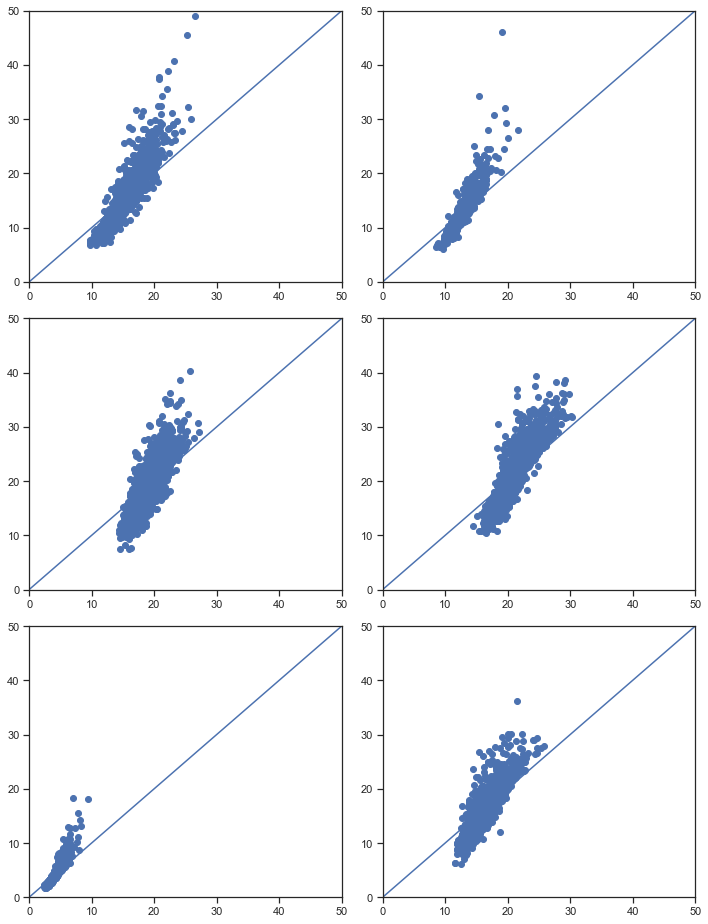

In [43]:
fig, ax = plt.subplots(3,2, figsize=(10,13))

x = 'Predicted Readmission Rate'
y = 'Readmissions Rate'

f1 = filter(clean_data, 'Measure Name', 'READM-30-AMI-HRRP')
f2 = filter(clean_data, 'Measure Name', 'READM-30-CABG-HRRP')
f3 = filter(clean_data, 'Measure Name', 'READM-30-COPD-HRRP')
f4 = filter(clean_data, 'Measure Name', 'READM-30-HF-HRRP')
f5 = filter(clean_data, 'Measure Name', 'READM-30-HIP-KNEE-HRRP')
f6 = filter(clean_data, 'Measure Name', 'READM-30-PN-HRRP')

ax[0][0].scatter(f1[x],f1[y])
ax[0][1].scatter(f2[x],f2[y])
ax[1][0].scatter(f3[x],f3[y])
ax[1][1].scatter(f4[x],f4[y])
ax[2][0].scatter(f5[x],f5[y])
ax[2][1].scatter(f6[x],f6[y])

x_max = 50
y_max = 50
a = range(x_max+1)

ax[0][0].plot(a,a)
ax[0][1].plot(a,a)
ax[1][0].plot(a,a)
ax[1][1].plot(a,a)
ax[2][0].plot(a,a)
ax[2][1].plot(a,a)

ax[0][0].set_xlim([0,x_max])
ax[0][1].set_xlim([0,x_max])
ax[1][0].set_xlim([0,x_max])
ax[1][1].set_xlim([0,x_max])
ax[2][0].set_xlim([0,x_max])
ax[2][1].set_xlim([0,x_max])

ax[0][0].set_ylim([0,y_max])
ax[0][1].set_ylim([0,y_max])
ax[1][0].set_ylim([0,y_max])
ax[1][1].set_ylim([0,y_max])
ax[2][0].set_ylim([0,y_max])
ax[2][1].set_ylim([0,y_max])

plt.tight_layout()

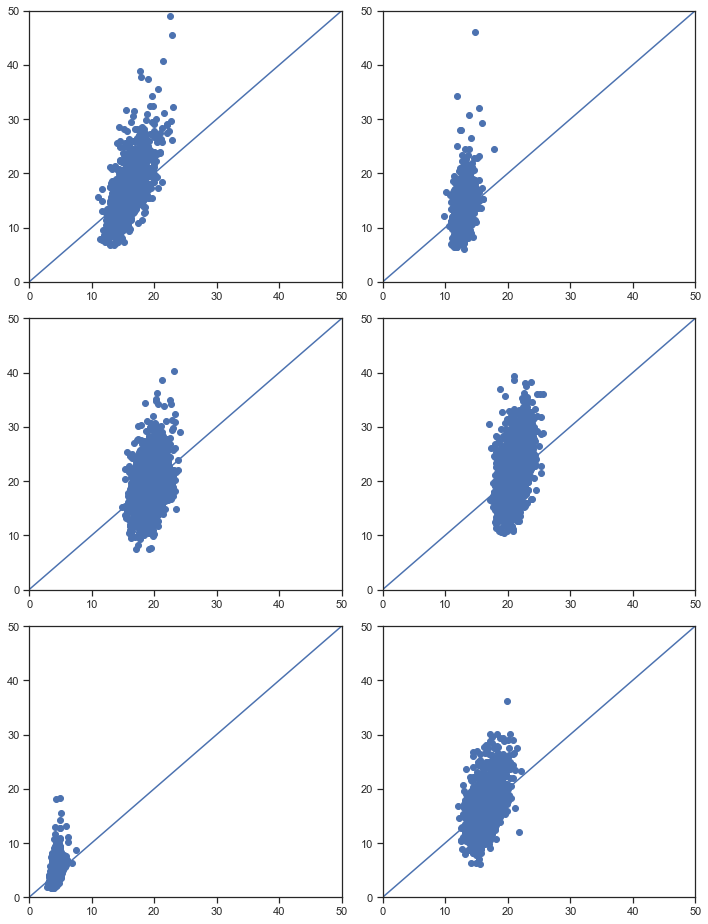

In [44]:
fig, ax = plt.subplots(3,2, figsize=(10,13))

x = 'Expected Readmission Rate'
y = 'Readmissions Rate'

f1 = filter(clean_data, 'Measure Name', 'READM-30-AMI-HRRP')
f2 = filter(clean_data, 'Measure Name', 'READM-30-CABG-HRRP')
f3 = filter(clean_data, 'Measure Name', 'READM-30-COPD-HRRP')
f4 = filter(clean_data, 'Measure Name', 'READM-30-HF-HRRP')
f5 = filter(clean_data, 'Measure Name', 'READM-30-HIP-KNEE-HRRP')
f6 = filter(clean_data, 'Measure Name', 'READM-30-PN-HRRP')

ax[0][0].scatter(f1[x],f1[y])
ax[0][1].scatter(f2[x],f2[y])
ax[1][0].scatter(f3[x],f3[y])
ax[1][1].scatter(f4[x],f4[y])
ax[2][0].scatter(f5[x],f5[y])
ax[2][1].scatter(f6[x],f6[y])

x_max = 50
y_max = 50
a = range(x_max+1)

ax[0][0].plot(a,a)
ax[0][1].plot(a,a)
ax[1][0].plot(a,a)
ax[1][1].plot(a,a)
ax[2][0].plot(a,a)
ax[2][1].plot(a,a)

ax[0][0].set_xlim([0,x_max])
ax[0][1].set_xlim([0,x_max])
ax[1][0].set_xlim([0,x_max])
ax[1][1].set_xlim([0,x_max])
ax[2][0].set_xlim([0,x_max])
ax[2][1].set_xlim([0,x_max])

ax[0][0].set_ylim([0,y_max])
ax[0][1].set_ylim([0,y_max])
ax[1][0].set_ylim([0,y_max])
ax[1][1].set_ylim([0,y_max])
ax[2][0].set_ylim([0,y_max])
ax[2][1].set_ylim([0,y_max])

plt.tight_layout()

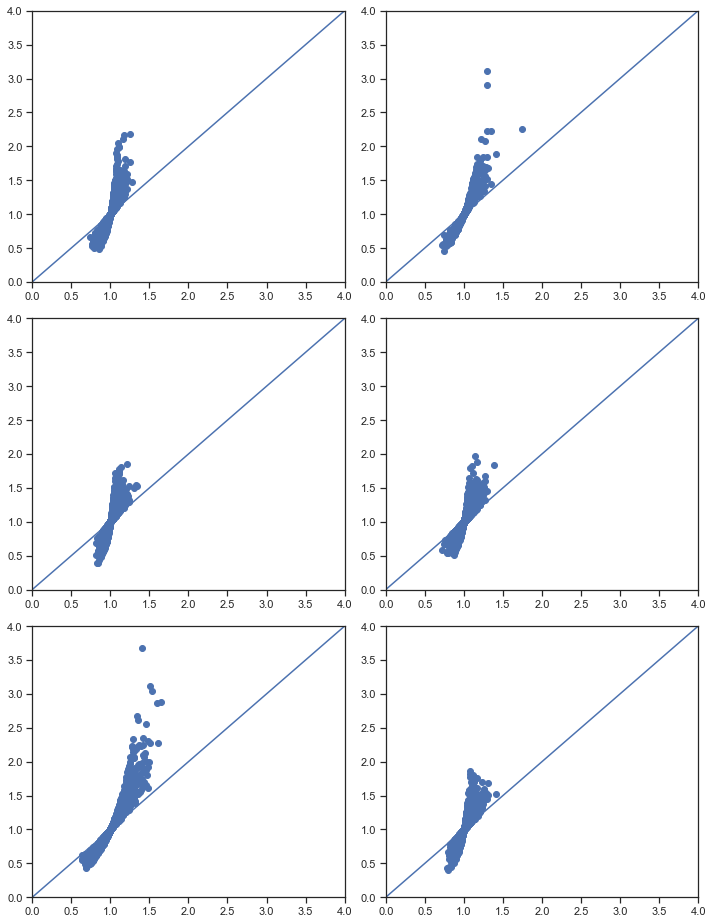

In [45]:
fig, ax = plt.subplots(3,2, figsize=(10,13))

x = 'Excess Readmission Ratio'
y = 'Actual Excess Readmission Ratio'

f1 = filter(clean_data, 'Measure Name', 'READM-30-AMI-HRRP')
f2 = filter(clean_data, 'Measure Name', 'READM-30-CABG-HRRP')
f3 = filter(clean_data, 'Measure Name', 'READM-30-COPD-HRRP')
f4 = filter(clean_data, 'Measure Name', 'READM-30-HF-HRRP')
f5 = filter(clean_data, 'Measure Name', 'READM-30-HIP-KNEE-HRRP')
f6 = filter(clean_data, 'Measure Name', 'READM-30-PN-HRRP')

ax[0][0].scatter(f1[x],f1[y])
ax[0][1].scatter(f2[x],f2[y])
ax[1][0].scatter(f3[x],f3[y])
ax[1][1].scatter(f4[x],f4[y])
ax[2][0].scatter(f5[x],f5[y])
ax[2][1].scatter(f6[x],f6[y])

x_max = 4
y_max = 4
a = range(x_max+1)

ax[0][0].plot(a,a)
ax[0][1].plot(a,a)
ax[1][0].plot(a,a)
ax[1][1].plot(a,a)
ax[2][0].plot(a,a)
ax[2][1].plot(a,a)

ax[0][0].set_xlim([0,x_max])
ax[0][1].set_xlim([0,x_max])
ax[1][0].set_xlim([0,x_max])
ax[1][1].set_xlim([0,x_max])
ax[2][0].set_xlim([0,x_max])
ax[2][1].set_xlim([0,x_max])

ax[0][0].set_ylim([0,y_max])
ax[0][1].set_ylim([0,y_max])
ax[1][0].set_ylim([0,y_max])
ax[1][1].set_ylim([0,y_max])
ax[2][0].set_ylim([0,y_max])
ax[2][1].set_ylim([0,y_max])

plt.tight_layout()